# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
!pip install scikit-optimize
from skopt import BayesSearchCV

# **2. Memuat Dataset**

In [65]:
# Baca file CSV dari URL
df = pd.read_csv('/content/drive/MyDrive/Data Science/Data/creditapproval-data_kotor.csv')

# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
df.head()

,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
0,x1,P,40.0,345000.0,1.0,345000.00,100,301,6000.0,1,874,875,345000.0,345000.00,0.0,MACET
1,x2,L,31.0,350000.0,7.0,55716.00,100,301,6000.0,1,874,875,390000.0,111428.00,0.0,MACET
2,x3,L,NaN,649926.0,6.0,108321.00,100,301,6000.0,1,874,875,649926.0,216642.00,0.0,MACET
3,x4,P,2.0,459168.0,NaN,38264.00,100,301,6000.0,1,874,875,459168.0,382640.00,0.0,MACET
4,x5,WANITA,34.0,3055499.0,8.0,381937.41,100,301,6000.0,1,874,875,3055499.0,1527749.48,0.0,MACET


**Pendefinisian Variabel**

<br>

`jenis_kelamin` = Jenis kelamin terdiri dari P dan L \
`umur`          = usia nasabah \
`jml_pinjaman`  = jumlah pinjaman nasabah \
`jkw`           = jangka waktu (bulan) \
`jml_angsuran_per_bulan` = jumlah angsuran yang harus dibayar tiap bulan \
`type_pinjaman`  = tipe pinjaman \
`jenis_pinjaman`  = jenis pinjaman \
`bi_sektor_ekonomi` = Sektor Ekonomi BI \
`col` \
`bi_golongan_debitur` = golongan debitur \
`bi_gol_penjamin` = golongan penjamin \
`saldo_nominatif` = saldo nominatif nasabah
<br>
`tunggakan_pokok` = tunggakan pokok yang harus dibayar nasabah
<br>
`tunggakan_bunga` = tunggakan bunga yang harus dibayar nasabah  <br>
`status kredit` = status kredit nasabah          

# **3. Data Preprosessing**

In [66]:
df.shape
#menghitung jumlah baris dan kolom

(766, 16)

In [67]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nama_nasabah            766 non-null    object 
 1   jenis_kelamin           766 non-null    object 
 2   umur                    757 non-null    float64
 3   jml_pinjaman            766 non-null    float64
 4   jkw                     758 non-null    float64
 5   jml_angsuran_per_bulan  766 non-null    float64
 6   type_pinjaman           766 non-null    int64  
 7   jenis_pinjaman          766 non-null    int64  
 8   bi_sektor_ekonomi       765 non-null    float64
 9   col                     766 non-null    int64  
 10  bi_golongan_debitur     766 non-null    int64  
 11  bi_gol_penjamin         766 non-null    int64  
 12  saldo_nominatif         766 non-null    float64
 13  tunggakan_pokok         766 non-null    float64
 14  tunggakan_bunga         766 non-null    fl

In [68]:
duplicate = df[df.duplicated()]
print("Jumlah Data yang Duplikat : ", duplicate.shape)

Jumlah Data yang Duplikat :  (0, 16)


In [69]:
#mengecek jumlah missing value
df.isnull().sum()

,0
nama_nasabah,0
jenis_kelamin,0
umur,9
jml_pinjaman,0
jkw,8
jml_angsuran_per_bulan,0
type_pinjaman,0
jenis_pinjaman,0
bi_sektor_ekonomi,1
col,0


- terdapat 9 row kolom `umur` memiliki missing value
- terdapat 8 row kolom `jkw` memiliki missing value
- terdapat 1 row kolom `bi_sektor_ekonomi` memiliki missing value

In [70]:
data = df.dropna() # data dihapus tapi file asli masih utuh
#df.dropna(inplace = True) akan menghapus juga di data aslinya
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 753 entries, 0 to 765
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nama_nasabah            753 non-null    object 
 1   jenis_kelamin           753 non-null    object 
 2   umur                    753 non-null    float64
 3   jml_pinjaman            753 non-null    float64
 4   jkw                     753 non-null    float64
 5   jml_angsuran_per_bulan  753 non-null    float64
 6   type_pinjaman           753 non-null    int64  
 7   jenis_pinjaman          753 non-null    int64  
 8   bi_sektor_ekonomi       753 non-null    float64
 9   col                     753 non-null    int64  
 10  bi_golongan_debitur     753 non-null    int64  
 11  bi_gol_penjamin         753 non-null    int64  
 12  saldo_nominatif         753 non-null    float64
 13  tunggakan_pokok         753 non-null    float64
 14  tunggakan_bunga         753 non-null    float64

In [71]:
#mengecek kembali jumlah missing value
data.isnull().sum()

,0
nama_nasabah,0
jenis_kelamin,0
umur,0
jml_pinjaman,0
jkw,0
jml_angsuran_per_bulan,0
type_pinjaman,0
jenis_pinjaman,0
bi_sektor_ekonomi,0
col,0


In [72]:
data.describe(include='all')

,nama_nasabah,jenis_kelamin,umur,jml_pinjaman,jkw,jml_angsuran_per_bulan,type_pinjaman,jenis_pinjaman,bi_sektor_ekonomi,col,bi_golongan_debitur,bi_gol_penjamin,saldo_nominatif,tunggakan_pokok,tunggakan_bunga,status kredit
count,753,753,753.000000,7.530000e+02,753.000000,7.530000e+02,753.0,753.000000,753.000000,753.000000,753.000000,753.000000,7.530000e+02,7.530000e+02,7.530000e+02,753
unique,753,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,x766,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MACET
freq,1,451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,544
mean,NaN,NaN,29.055777,2.422691e+06,19.087649,2.237880e+05,100.0,301.200531,6013.253652,1.219124,873.968127,272.212483,1.733517e+06,6.714973e+05,7.933769e+04,NaN
std,NaN,NaN,265.251476,5.793668e+06,32.324325,4.847813e+05,0.0,0.828931,217.908117,0.413927,1.472819,404.488954,4.452752e+06,2.536278e+06,5.078492e+05,NaN
min,NaN,NaN,-7162.000000,8.333333e+04,1.000000,0.000000e+00,100.0,301.000000,6000.000000,1.000000,834.000000,0.000000,-4.000000e+06,0.000000e+00,0.000000e+00,NaN
25%,NaN,NaN,32.000000,8.600000e+05,8.000000,6.750000e+04,100.0,301.000000,6000.000000,1.000000,874.000000,0.000000,5.350000e+05,9.500000e+04,0.000000e+00,NaN
50%,NaN,NaN,38.000000,1.500000e+06,12.000000,1.050000e+05,100.0,301.000000,6000.000000,1.000000,874.000000,0.000000,9.470000e+05,3.418728e+05,0.000000e+00,NaN
75%,NaN,NaN,43.000000,2.000000e+06,20.000000,2.333332e+05,100.0,301.000000,6000.000000,1.000000,874.000000,875.000000,1.625000e+06,7.500000e+05,6.000000e+04,NaN


In [73]:
data.nunique()

,0
nama_nasabah,753
jenis_kelamin,6
umur,58
jml_pinjaman,319
jkw,51
jml_angsuran_per_bulan,439
type_pinjaman,1
jenis_pinjaman,5
bi_sektor_ekonomi,3
col,2


Dapat dilihat terdapat beberapa kolom memiliki tipe data `object` sedangkan seharusnya adalah `category` agar lebih efektif karena memiliki jumlah nilai unik sedikit. Kolom tersebut adalah `Jenis Kelamin` dan kolom `status kredit`.

In [74]:
# Mengumpulkan kolom-kolom yang dingin diubah pada 1 list
kolom_diubah = ['jenis_kelamin', 'status kredit']

data[kolom_diubah] = data[kolom_diubah].astype('category')
data.dtypes

<ipython-input-74-7121367eda75>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[kolom_diubah] = data[kolom_diubah].astype('category')


,0
nama_nasabah,object
jenis_kelamin,category
umur,float64
jml_pinjaman,float64
jkw,float64
jml_angsuran_per_bulan,float64
type_pinjaman,int64
jenis_pinjaman,int64
bi_sektor_ekonomi,float64
col,int64


In [75]:
data['jenis_kelamin'].unique()

['P', 'L', 'WANITA', 'LAKI-LAKI', 'PRIA', 'PEREMPUAN']
Categories (6, object): ['L', 'LAKI-LAKI', 'P', 'PEREMPUAN', 'PRIA', 'WANITA']

In [76]:
data["jenis_kelamin"] = data["jenis_kelamin"].replace("WANITA", "P")
data["jenis_kelamin"] = data["jenis_kelamin"].replace("PEREMPUAN", "P")
data["jenis_kelamin"] = data["jenis_kelamin"].replace("LAKI-LAKI", "L")
data["jenis_kelamin"] = data["jenis_kelamin"].replace("PRIA", "L")


<ipython-input-76-929c7ae829df>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data["jenis_kelamin"] = data["jenis_kelamin"].replace("WANITA", "P")
<ipython-input-76-929c7ae829df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["jenis_kelamin"] = data["jenis_kelamin"].replace("WANITA", "P")
<ipython-input-76-929c7ae829df>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change th

In [77]:
data['jenis_kelamin'].unique()

['P', 'L']
Categories (2, object): ['L', 'P']

In [78]:
target = [ 'jenis_kelamin']
label_encoder = LabelEncoder()

# Apply Label Encoding to the target columns
for column in target:
    data[column] = label_encoder.fit_transform(data[column])

# Display the DataFrame 'data' after Label Encoding
data[target]

<ipython-input-78-dff01a82ec9c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = label_encoder.fit_transform(data[column])


,jenis_kelamin
0,1
1,0
4,1
7,0
9,0
...,...
761,0
762,1
763,0
764,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [79]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Pisahkan fitur (X) dan target (y)
kolom = ['nama_nasabah','status kredit', 'col', 'bi_golongan_debitur',
         'bi_gol_penjamin', 'bi_sektor_ekonomi','type_pinjaman','jenis_pinjaman']
X = data.drop(columns=kolom)
y = data['status kredit']

# Pastikan target (y) adalah tipe kategori atau integer
y = y.astype('category')


# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(602, 8), y_train=(602,)
Test set shape: X_test=(151, 8), y_test=(151,)


<ipython-input-79-ad5f02183fd7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numeric_columns] = scaler.fit_transform(data[numeric_columns])


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [80]:
# Part 1: Model Training
# Train each classifier separately
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Dalam proyek ini, saya menerapkan beberapa algoritma untuk melakukan klasifikasi pada data hasil clustering. Tujuan utama dari penerapan berbagai algoritma ini adalah untuk membandingkan akurasi yang dihasilkan oleh masing-masing model dan menemukan algoritma terbaik yang dapat digunakan untuk klasifikasi data secara optimal.

a. K-Nearest Neighbors (KNN)
- Metode berbasis kedekatan antar data (proximity-based).
- Menentukan kelas suatu data berdasarkan mayoritas kelas dari k-tetangga terdekatnya.

b. Decision Tree (DT)
- Algoritma berbasis pohon keputusan yang membagi data ke dalam cabang-cabang berdasarkan aturan keputusan.
- Cocok untuk data dengan relasi non-linear yang kompleks.

c. Random Forest (RF)
- Kombinasi dari banyak pohon keputusan (ensemble learning) untuk meningkatkan akurasi dan mengurangi overfitting.
- Setiap pohon dalam Random Forest dilatih pada subset data yang berbeda.

d. Support Vector Machine (SVM)
- Mencari hyperplane terbaik yang memisahkan data ke dalam kelas-kelas yang berbeda.
- Cocok untuk data dengan dimensi tinggi dan pola yang kompleks.

e. Naïve Bayes (NB)
- Algoritma berbasis probabilitas yang menggunakan Teorema Bayes.
- Mengasumsikan bahwa setiap fitur bersifat independen satu sama lain.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

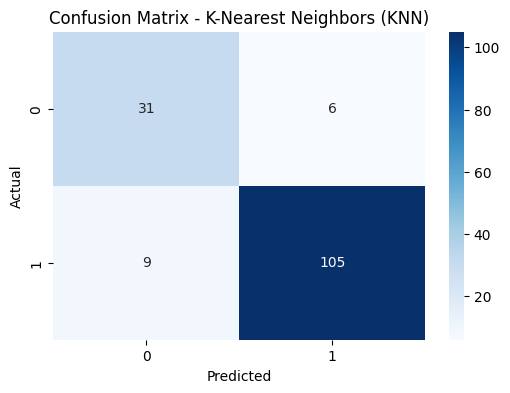

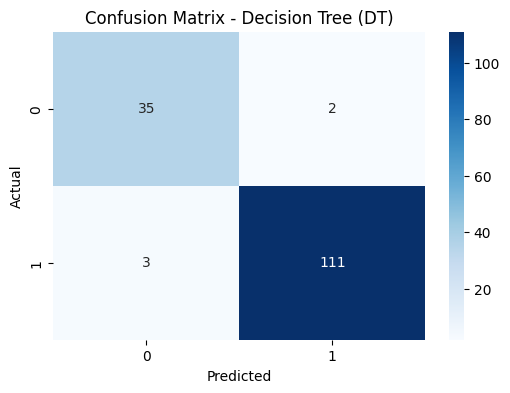

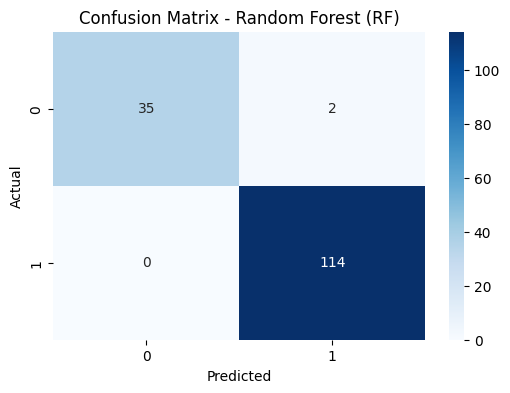

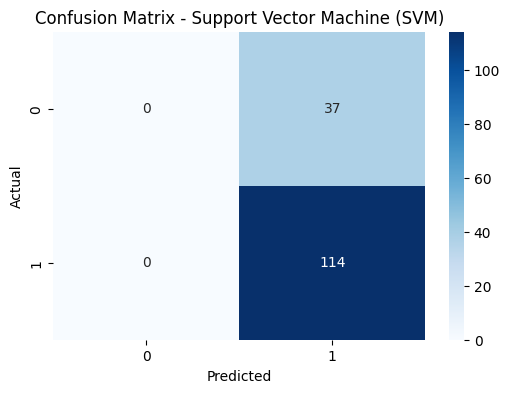

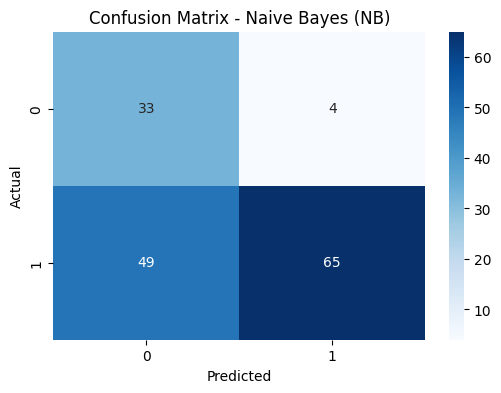

In [81]:
# Fungsi untuk mengevaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, pos_label='MACET'),
        'Recall': recall_score(y_test, y_pred, pos_label='MACET'),
        'F1-Score': f1_score(y_test, y_pred, pos_label='MACET'),
        'y_pred': y_pred  # simpan prediksi buat nanti plotting
    }
    return results


# Plot Confusion Matrix untuk setiap model (DIPISAH)
for model_name, metrics in results.items():
    cm = metrics['Confusion Matrix']
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [82]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, pos_label='MACET'),
        'Recall': recall_score(y_test, y_pred, pos_label='MACET'),
        'F1-Score': f1_score(y_test, y_pred, pos_label='MACET')
    }
    return results


# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)


                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.900662   0.945946  0.921053  0.933333
1            Decision Tree (DT)  0.973510   0.982456  0.982456  0.982456
2            Random Forest (RF)  0.980132   0.974359  1.000000  0.987013
3  Support Vector Machine (SVM)  0.754967   0.754967  1.000000  0.860377
4              Naive Bayes (NB)  0.649007   0.942029  0.570175  0.710383


# **Analisis Hasil Evaluasi Model**

Berdasarkan data evaluasi yang diperbarui, berikut adalah analisis untuk masing-masing model dengan mempertimbangkan metrik **Accuracy, Precision, Recall, dan F1-Score**.

---

## **1. K-Nearest Neighbors (KNN)**
- **Accuracy**: 90.07%
- **Precision**: 94.59%
- **Recall**: 92.11%
- **F1-Score**: 93.33%

**Analisis**:  
KNN menunjukkan performa yang baik dengan akurasi **90.07%**.  
Precision (**94.59%**) dan Recall (**92.11%**) menunjukkan keseimbangan cukup baik antara presisi dan sensitivitas.  
F1-Score **93.33%** mengindikasikan bahwa model ini mampu mengklasifikasikan data dengan cukup akurat.

---

## **2. Decision Tree (DT)**
- **Accuracy**: 97.35%
- **Precision**: 98.25%
- **Recall**: 98.25%
- **F1-Score**: 98.25%

**Analisis**:  
Decision Tree memiliki performa sangat baik dengan akurasi tinggi **97.35%**.  
Precision dan Recall yang sama tinggi (**98.25%**) menunjukkan model ini konsisten dalam klasifikasinya.  
F1-Score **98.25%** memperkuat keandalan model ini dalam mengklasifikasikan data.

---

## **3. Random Forest (RF)**
- **Accuracy**: 98.01%
- **Precision**: 97.44%
- **Recall**: 100.00%
- **F1-Score**: 98.70%

**Analisis**:  
Random Forest mencatat performa terbaik dengan **akurasi 98.01%**.  
Recall sempurna (**100.00%**) menunjukkan bahwa semua kasus positif berhasil terdeteksi.  
F1-Score **98.70%** mengindikasikan bahwa model ini sangat stabil dan efektif untuk klasifikasi.

---

## **4. Support Vector Machine (SVM)**
- **Accuracy**: 75.50%
- **Precision**: 75.50%
- **Recall**: 100.00%
- **F1-Score**: 86.04%

**Analisis**:  
SVM memiliki Recall tertinggi (**100.00%**) namun akurasi keseluruhan rendah (**75.50%**).  
Precision yang cukup (**75.50%**) menunjukkan banyaknya false positive.  
F1-Score **86.04%** mengindikasikan bahwa model ini tetap efektif jika Recall menjadi prioritas utama.

---

## **5. Naive Bayes (NB)**
- **Accuracy**: 64.90%
- **Precision**: 94.20%
- **Recall**: 57.02%
- **F1-Score**: 71.04%

**Analisis**:  
Naive Bayes memiliki akurasi terendah (**64.90%**) dengan Precision tinggi (**94.20%**) namun Recall rendah (**57.02%**).  
F1-Score **71.04%** menunjukkan bahwa model ini kurang seimbang dalam mendeteksi semua kasus positif.  
Model ini mungkin cocok jika lebih mementingkan Precision dibandingkan Recall.

---

# **Kesimpulan**

1. **Random Forest (RF)** memiliki performa terbaik secara keseluruhan dengan **akurasi 98.01%**, **Recall 100%**, dan **F1-Score 98.70%**.
2. **Decision Tree (DT)** juga menunjukkan performa yang sangat baik dengan **akurasi 97.35%**.
3. **KNN** cukup stabil dengan akurasi **90.07%**, sedangkan **SVM** dan **Naive Bayes** lebih lemah dari segi akurasi.

---

# **Rekomendasi**

- Jika mengutamakan **akurasi dan kestabilan klasifikasi**, maka **Random Forest (RF)** atau **Decision Tree (DT)** sangat disarankan.
- Jika memprioritaskan **Recall** (menangkap seluruh kasus positif), baik **Random Forest** maupun **SVM** bisa dipertimbangkan, namun SVM memiliki akurasi keseluruhan lebih rendah.
- **Naive Bayes** bisa dipilih bila **Precision** lebih penting, namun perlu hati-hati karena Recall-nya rendah.


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [83]:
# Definisi model
dt = DecisionTreeClassifier()

# Hyperparameter yang akan diuji
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV dengan cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit model dengan GridSearchCV
grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9485123966942149


In [84]:
# Definisi model
rf = RandomForestClassifier()

# Hyperparameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV dengan cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit model dengan GridSearchCV
grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Score: 0.9551652892561983


In [85]:
# Definisikan model Decision Tree
dt = DecisionTreeClassifier()

# Definisikan ruang pencarian untuk Bayesian Optimization
param_space = {
    'criterion': ['gini', 'entropy'],
    'max_depth': (5, 50),  # Rentang kedalaman pohon
    'min_samples_split': (2, 10),  # Rentang jumlah sampel minimum untuk membagi node
    'min_samples_leaf': (1, 5)  # Rentang jumlah sampel minimum di setiap leaf node
}

# Inisialisasi BayesSearchCV
bayes_search = BayesSearchCV(estimator=dt, search_spaces=param_space, n_iter=32, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Lakukan pencarian hyperparameter terbaik
bayes_search.fit(X_train, y_train)

# Output hasil terbaik
print(f"Best parameters (Bayesian Optimization): {bayes_search.best_params_}")
best_dt_bayes = bayes_search.best_estimator_

# Evaluasi performa model pada test set
bayes_search_score = best_dt_bayes.score(X_test, y_test)
print(f"Accuracy after Bayesian Optimization: {bayes_search_score:.2f}")


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [86]:
# Definisikan ruang pencarian untuk Bayesian Optimization
param_space = {
    'n_estimators': (100, 500),
    'max_depth': (10, 50),
    'min_samples_split': (2, 10),
    'criterion': ['gini', 'entropy']
}

# Inisialisasi BayesSearchCV
bayes_search = BayesSearchCV(estimator=rf, search_spaces=param_space, n_iter=32, cv=3, n_jobs=-1, verbose=2, random_state=42)
bayes_search.fit(X_train, y_train)

# Output hasil terbaik
print(f"Best parameters (Bayesian Optimization): {bayes_search.best_params_}")
best_rf_bayes = bayes_search.best_estimator_




Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [87]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluasi performa model pada test set
bayes_search_score = best_dt_bayes.score(X_test, y_test)
print(f"Accuracy after Bayesian Optimization: {bayes_search_score:.2f}")

# Prediksi menggunakan model terbaik
y_pred = best_dt_bayes.predict(X_test)

# Menghitung metrik lainnya
precision1 = precision_score(y_test, y_pred, average='macro')
recall1 = recall_score(y_test, y_pred, average='macro')
f11 = f1_score(y_test, y_pred, average='macro')

print(f"Precision after Bayesian Optimization: {precision1:.2f}")
print(f"Recall after Bayesian Optimization: {recall1:.2f}")
print(f"F1-Score after Bayesian Optimization: {f11:.2f}")


Accuracy after Bayesian Optimization: 0.96
Precision after Bayesian Optimization: 0.93
Recall after Bayesian Optimization: 0.96
F1-Score after Bayesian Optimization: 0.95


In [88]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluasi performa model pada test set
bayes_search_score = best_rf_bayes.score(X_test, y_test)
print(f"Accuracy after Bayesian Optimization: {bayes_search_score:.2f}")

# Prediksi menggunakan model terbaik
y_pred = best_rf_bayes.predict(X_test)

# Menghitung metrik lainnya
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Precision after Bayesian Optimization: {precision:.2f}")
print(f"Recall after Bayesian Optimization: {recall:.2f}")
print(f"F1-Score after Bayesian Optimization: {f1:.2f}")


Accuracy after Bayesian Optimization: 0.97
Precision after Bayesian Optimization: 0.98
Recall after Bayesian Optimization: 0.95
F1-Score after Bayesian Optimization: 0.96


**SEBELUM TUNING**

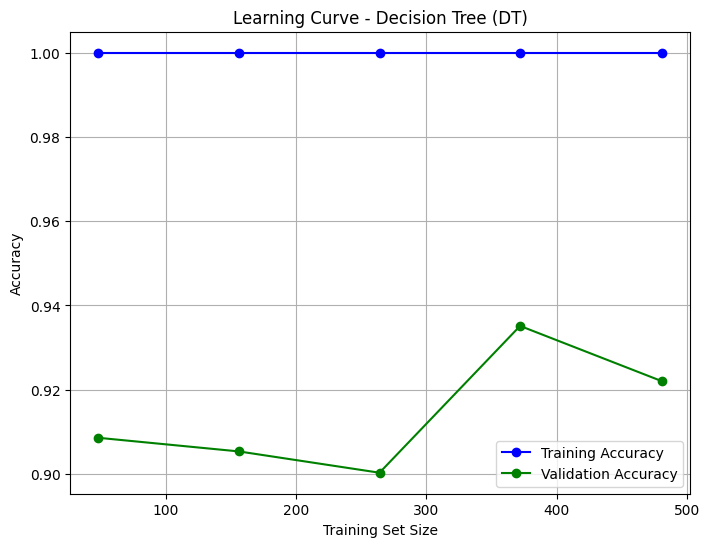

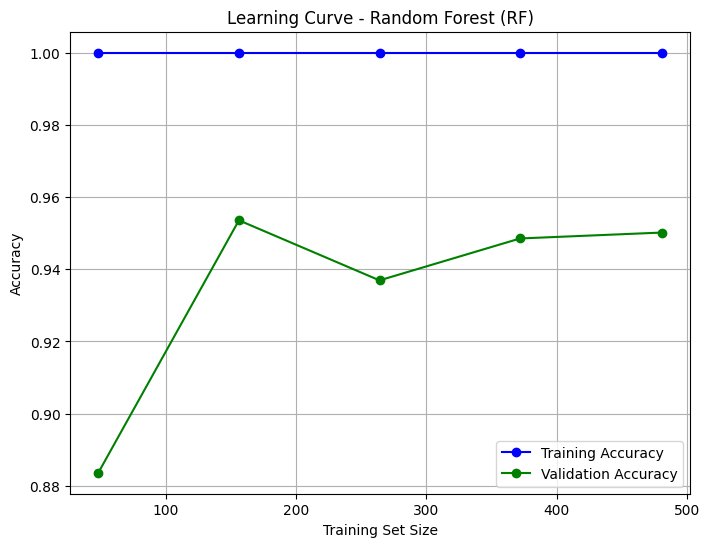

In [89]:
# Daftar model yang akan dievaluasi
models = {
    "Decision Tree (DT)": DecisionTreeClassifier(max_depth=None, random_state=42),
    "Random Forest (RF)": RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
}

# Fungsi untuk menampilkan learning curve
def plot_learning_curve(model, model_name, X_train, y_train):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Accuracy")
    plt.plot(train_sizes, test_mean, 'o-', color="green", label="Validation Accuracy")
    plt.title(f"Learning Curve - {model_name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

# Iterasi untuk semua model
for model_name, model in models.items():
    plot_learning_curve(model, model_name, X_train, y_train)


**SETELAH TUNNIG**

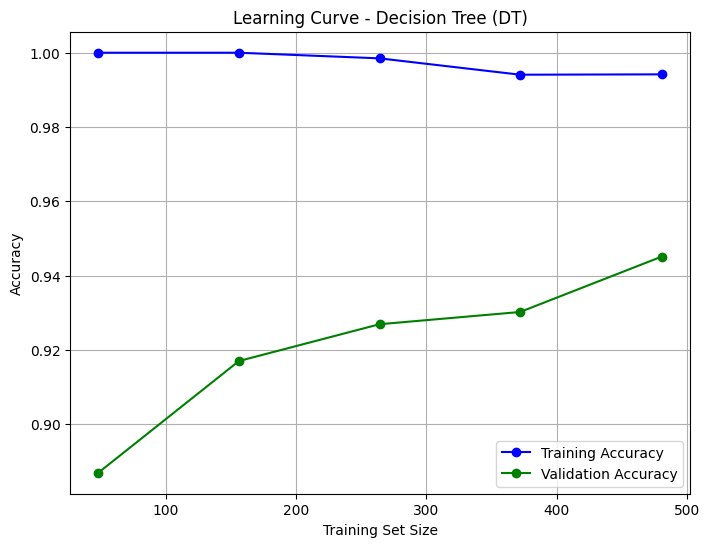

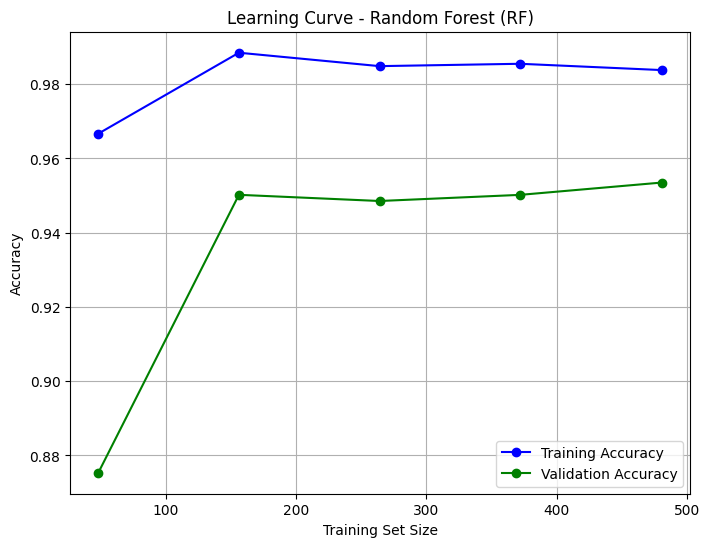

In [90]:
# Gunakan model yang sudah dituning
models = {
    "Decision Tree (DT)": best_dt_bayes,  # Model DT hasil tuning
    "Random Forest (RF)": best_rf_bayes   # Model RF hasil tuning
}


# Fungsi untuk menampilkan learning curve
def plot_learning_curve(model, model_name, X_train, y_train):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training Accuracy")
    plt.plot(train_sizes, test_mean, 'o-', color="green", label="Validation Accuracy")
    plt.title(f"Learning Curve - {model_name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

# Iterasi untuk semua model
for model_name, model in models.items():
    plot_learning_curve(model, model_name, X_train, y_train)
